# Introduction and Library Imports



In [34]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import seaborn as sns
import warnings
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import torch
from torch.autograd import Variable



# Question 1: Unexpected Plots

In [4]:
def print_centroids(num_centroids = 10000):
    '''
    function creates a hexagon, picks random point inside, then picks centroid using random adjacent veritices
    input: number of centroids to plot (num_centroids)
    output: plot of the centroids and hexagon vertices
    '''
    
    # define polygon points for hexagon => points were randomly selected
    points_list = [(19, 24), (49, 1), (95, 1), (125.0, 24), (95, 47), (49, 47)]

    counter = 0
    P_points = []
    x_seg1 = np.arange(19,50,1).tolist()
    x_seg2 = np.arange(95,126,1).tolist()

    #calculate intercepts for the diagonal lines 
    C = 47 - ((23/30)*49)
    C2 = 1 - ((-23/30)*49)
    C3 = 47 + ((23/30)*95)
    C4 =  1 - ((23/30)*95)

    # choose the point P
    x,y = zip(*points_list)
    x_limits = np.arange(min(x),max(x)+1)
    y_limits =  np.arange(min(y),max(y)+1)

    original_points = []
    point_y = np.random.choice(y_limits)   
    while counter < num_centroids:

        #pick random point inside hexagon
        point_x = np.random.choice(x_limits)


        #account for sections with diagonal lines
        if point_x in x_seg1:
            while (point_y >  ((23/30)*point_x) + C) or (point_y < ((-23/30)*point_x) + C2):
                point_y = np.random.choice(y_limits)
        elif point_x in x_seg2:
            while (point_y >  ((-23/30)*point_x) + C3) or  (point_y <  ((23/30)*point_x) + C4):
                point_y = np.random.choice(y_limits)
        else:
            point_y = np.random.choice(y_limits)


        #pick two adjacent vertices by using the index positions
        vertices = random.sample(points_list ,2)

        while abs(points_list.index(vertices[0]) - points_list.index(vertices[1])) != 1 and \
              abs(points_list.index(vertices[0]) - points_list.index(vertices[1])) != 5:
                      vertices = random.sample(points_list ,2)

        x_vertice, y_vertice = zip(*vertices)
        original_points.append((point_x,point_y))

        #calculate centroids
        Triangle_x_centroid = point_x/3 + sum(x_vertice)/3
        Triangle_y_centroid = point_y/3 + sum(y_vertice)/3

        save_point_p = (Triangle_x_centroid,Triangle_y_centroid)
        P_points.append(save_point_p)

        counter +=1

    # make plots
    fig, ax = plt.subplots()
    x_p,y_p = zip(*P_points)
    sns.scatterplot(x=x_p,y=y_p, label = "random centroids", ax = ax)
    sns.scatterplot(x=x,y=y, label = "Hexagon_vertices", ax = ax) 
    
    return ax

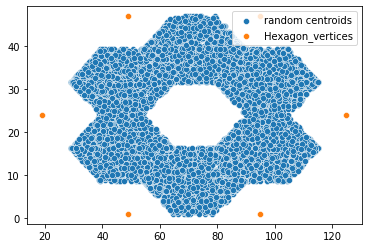

In [5]:
# function call with 10000 centroids
ax = print_centroids()

# Question 2: Datascience with Pandas and Movie Data

## 2.1 Read Files In

In [6]:
# read in files from public s3 bucket
!wget  "https://dsidata.s3.amazonaws.com/data_akas.tsv" -O data_akas.tsv
!wget  "https://dsidata.s3.amazonaws.com/data_basics.tsv" -O data_basics.tsv
!wget  "https://dsidata.s3.amazonaws.com/data_ratings.tsv" -O data_ratings.tsv

--2021-12-30 10:20:48--  https://dsidata.s3.amazonaws.com/data_akas.tsv
Resolving dsidata.s3.amazonaws.com (dsidata.s3.amazonaws.com)... 52.217.74.4
Connecting to dsidata.s3.amazonaws.com (dsidata.s3.amazonaws.com)|52.217.74.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180436875 (172M) [application/x-www-form-urlencoded]
Saving to: ‘data_akas.tsv’

data_akas.tsv       100%[===================>] 172.08M  53.5MB/s    in 3.2s    

2021-12-30 10:20:51 (53.5 MB/s) - ‘data_akas.tsv’ saved [180436875/180436875]

--2021-12-30 10:20:51--  https://dsidata.s3.amazonaws.com/data_basics.tsv
Resolving dsidata.s3.amazonaws.com (dsidata.s3.amazonaws.com)... 52.217.169.193
Connecting to dsidata.s3.amazonaws.com (dsidata.s3.amazonaws.com)|52.217.169.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 452106547 (431M) [application/x-www-form-urlencoded]
Saving to: ‘data_basics.tsv’

data_basics.tsv     100%[===================>] 431.16M  61.5MB/s  

### basics dataset

In [7]:
#load data and view
data_basics = pd.read_csv("data_basics.tsv", delimiter="\t")
data_basics.head()



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [8]:
# check the number of duplicates using tconst
len(data_basics.loc[data_basics.duplicated(subset=['tconst'])== True].index)

0

In [9]:
# change startYear column to be consistent string
data_basics['startYear'] = data_basics['startYear'].astype(str)

### akas dataset

In [10]:
# load data and view
data_akas = pd.read_csv("data_akas.tsv", delimiter="\t")
data_akas.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
1,tt0000001,2,Карменсита,RU,\N,\N,\N,0
2,tt0000001,3,Carmencita,US,\N,\N,\N,0
3,tt0000001,4,Carmencita,\N,\N,original,\N,1
4,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1


In [11]:
# check the number of duplicates using tconst
len(data_akas.loc[data_akas.duplicated(subset=['titleId'])== True].index)

1406088

In [12]:
# check the number of duplicates using tconst and ordering combined
len(data_akas.loc[data_akas.duplicated(subset=['titleId','ordering'])== True].index)

0

### ratings dataset

In [13]:
# load and view data
data_ratings = pd.read_csv("data_ratings.tsv", delimiter="\t")
data_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.8,1422
1,tt0000002,6.4,168
2,tt0000003,6.6,1015
3,tt0000004,6.4,100
4,tt0000005,6.2,1713


In [14]:
# check the number of duplicates using tconst
len(data_ratings.loc[data_ratings.duplicated(subset=['tconst'])== True].index)

0

## 2.2 Remove duplicates

No duplicates found, akas dataset has duplicated IDs but each entry is unique with the "ordering" number

## 2.3 Merge all datasets

In [15]:
def merge_dataframes(how = "outer"):
    # merges the three dataframes above with the how option and returns merged datafram
    # input: a how option => {‘left’, ‘right’, ‘outer’, ‘inner’}
    # output: joined dataframe

    joined_A = data_basics.merge(data_akas, left_on='tconst', right_on='titleId', how = how,
             suffixes=('_basics', '_akas'))

    joined_B =  joined_A.merge(data_ratings, left_on='tconst', right_on='tconst', how = how)
    
    return joined_B


### 2.3.1 Outer Vs Inner Join

In [16]:
# try different joins and check length of dataframes
for how in ["left", "right", "outer", "inner"]:
    df = merge_dataframes(how)
    print(how + ", size:" + str(df.index.size))


left, size:6736361
right, size:1975956
outer, size:6740089
inner, size:1686547


The outer join has many more lines returned as unmatched fields in each dataframe are also returned.

### 2.3.2 Number of titleTypes

In [17]:
# merge the dataframe using an outer join
merged_df = merge_dataframes()
merged_df.head()


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",tt0000001,1.0,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0,5.8,1422.0
1,tt0000001,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",tt0000001,2.0,Карменсита,RU,\N,\N,\N,0,5.8,1422.0
2,tt0000001,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",tt0000001,3.0,Carmencita,US,\N,\N,\N,0,5.8,1422.0
3,tt0000001,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",tt0000001,4.0,Carmencita,\N,\N,original,\N,1,5.8,1422.0
4,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892,\N,5,"Animation,Short",tt0000002,1.0,Le clown et ses chiens,\N,\N,original,\N,1,6.4,168.0


In [21]:
# Number of title types
len(data_basics.titleType.unique())

10

10 title types

## 2.4 New_df

Make a new dataframe from step 2.3 by selecting only rows corresponding to
English-language films ('en') OR US-region films ('US') AND only those that are movies
(using the 'titleType' column). Put the resulting data into a new dataframe; call it df_new

In [22]:
merged_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",tt0000001,1.0,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0,5.8,1422.0
1,tt0000001,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",tt0000001,2.0,Карменсита,RU,\N,\N,\N,0,5.8,1422.0
2,tt0000001,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",tt0000001,3.0,Carmencita,US,\N,\N,\N,0,5.8,1422.0
3,tt0000001,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",tt0000001,4.0,Carmencita,\N,\N,original,\N,1,5.8,1422.0
4,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892,\N,5,"Animation,Short",tt0000002,1.0,Le clown et ses chiens,\N,\N,original,\N,1,6.4,168.0


In [23]:
# create the dataframe using boolean conditioning
df_new = merged_df.loc[((merged_df.region == "US") | (merged_df.language == "en")) & merged_df.titleType.notnull()]
df_new.tail()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,averageRating,numVotes
6733836,tt9115178,movie,Immortals in the Village,Tiao da shen,0.0,2017,\N,111,Documentary,tt9115178,2.0,Immortals in the Village,XWW,en,imdbDisplay,\N,0,NaN,NaN
6734004,tt9115560,short,Fabrica de pizzas,Fabrica de pizzas,0.0,2010,\N,3,Short,tt9115560,1.0,Pizza's Factory,XWW,en,alternative,\N,0,NaN,NaN
6734012,tt9115578,short,El quilpo sueñas cataratas,El quilpo sueñas cataratas,0.0,2012,\N,11,Short,tt9115578,2.0,The Quilpo Dreams Waterfalls,XWW,en,alternative,\N,0,NaN,NaN
6734044,tt9115648,tvMovie,Julie: My Favourite Things,Julie: My Favourite Things,0.0,1975,\N,\N,"Animation,Comedy,Music",tt9115648,3.0,Julie: My Favourite Things,US,\N,\N,\N,0,NaN,NaN
6734245,tt9116088,video,Pru: Aaroma (of a Man),Pru: Aaroma (of a Man),0.0,2001,\N,\N,"Music,Short",tt9116088,1.0,Pru: Aaroma,US,\N,\N,short title,0,NaN,NaN


## 2.5 Add "log10Votes" column

In [24]:
#drop duplicates here now, to have unique movies
df_new = df_new.drop_duplicates(subset=['tconst'])

In [25]:
df_new["log10Votes"] = np.log10(df_new.numVotes)
df_new.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,averageRating,numVotes,log10Votes
2,tt0000001,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",tt0000001,3.0,Carmencita,US,\N,\N,\N,0,5.8,1422.0,3.152900
8,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892,\N,5,"Animation,Short",tt0000002,5.0,The Clown and His Dogs,US,\N,\N,literal English title,0,6.4,168.0,2.225309
22,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893,\N,1,"Comedy,Short",tt0000005,1.0,Blacksmithing Scene,US,\N,alternative,\N,0,6.2,1713.0,3.233757
33,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0.0,1894,\N,1,Short,tt0000006,3.0,Chinese Opium Den,US,\N,\N,\N,0,5.5,88.0,1.944483
36,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0.0,1894,\N,1,"Short,Sport",tt0000007,1.0,Corbett and Courtney Before the Kinetograph,US,\N,\N,\N,0,5.5,573.0,2.758155


## 2.6 Lower the case of all text in the 'genres' column

In [26]:
df_new["genres"] = df_new["genres"].apply(lambda x: x.lower())
df_new.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,averageRating,numVotes,log10Votes
2,tt0000001,short,Carmencita,Carmencita,0.0,1894,\N,1,"documentary,short",tt0000001,3.0,Carmencita,US,\N,\N,\N,0,5.8,1422.0,3.152900
8,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892,\N,5,"animation,short",tt0000002,5.0,The Clown and His Dogs,US,\N,\N,literal English title,0,6.4,168.0,2.225309
22,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893,\N,1,"comedy,short",tt0000005,1.0,Blacksmithing Scene,US,\N,alternative,\N,0,6.2,1713.0,3.233757
33,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0.0,1894,\N,1,short,tt0000006,3.0,Chinese Opium Den,US,\N,\N,\N,0,5.5,88.0,1.944483
36,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0.0,1894,\N,1,"short,sport",tt0000007,1.0,Corbett and Courtney Before the Kinetograph,US,\N,\N,\N,0,5.5,573.0,2.758155


### 2.6.1 mean number of log10Votes

In [27]:
grouped_df = df_new.groupby(by="genres").mean()
grouped_df.sort_values(by='log10Votes', ascending = False)['log10Votes'].head(10)

genres
action,family,romance         4.801753
documentary,sport,thriller    4.386731
biography,fantasy,horror      4.271842
comedy,crime,sport            4.112184
fantasy,history,sci-fi        4.007449
crime,thriller,war            3.977815
documentary,music,thriller    3.974420
action,biography,thriller     3.965437
biography,crime,western       3.931153
film-noir,mystery,romance     3.864728
Name: log10Votes, dtype: float64

### 2.6.2 mean averageRating

In [28]:
grouped_df.sort_values(by='averageRating', ascending = False)['averageRating'].head(10)

genres
adventure,musical,sci-fi      9.80
biography,fantasy,short       9.60
animation,crime,fantasy       9.60
biography,family,short        9.50
family,fantasy,history        9.40
history,horror,musical        9.30
musical,mystery,short         9.30
music,war                     9.30
biography,crime,reality-tv    9.25
history,sport                 9.20
Name: averageRating, dtype: float64

## 2.7 Using ‘groupby’ group all data by averageRating and make a scatter plot of averageRating vs log10Votes

In [29]:
grouped_rating = df_new.groupby("averageRating", as_index = False).mean()
grouped_rating.head()

,averageRating,isAdult,ordering,numVotes,log10Votes
0,1.0,0.013333,1.186667,82.000000,1.314102
1,1.1,0.041667,1.395833,137.083333,1.705384
2,1.2,0.012987,1.493506,128.220779,1.684670
3,1.3,0.000000,1.388889,272.944444,1.767466
4,1.4,0.011494,1.333333,139.275862,1.634039


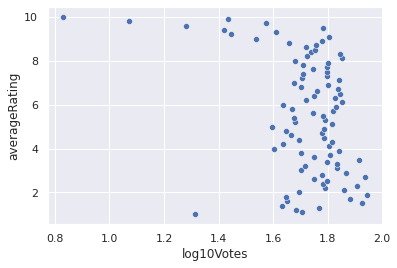

In [30]:
# make plots
sns.set()
sns.scatterplot(data = grouped_rating, y="averageRating", x = "log10Votes")

## 2.8 Perform linear regression on your data (averageRating vs log10Votes) created in the previous step in three different ways

### 2.8.1 sklearn linear regression

In [31]:
# get the x values and y values
x = grouped_rating[["log10Votes"]]
y= grouped_rating[["averageRating"]]

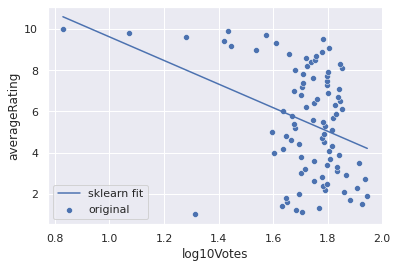

In [32]:
# define regressor
regr = linear_model.LinearRegression()

# fitting the training data
regr.fit(x,y)

# predict
y_prediction =  regr.predict(x)

# plot
sns.set()
sns.scatterplot(data = grouped_rating, y="averageRating", x = "log10Votes", label = "original")
sns.lineplot( x =  grouped_rating.log10Votes, y=y_prediction.flatten(), label = "sklearn fit")

### 2.8.2 Scipy linear regression




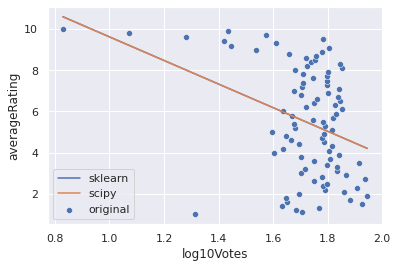

In [33]:
res = stats.linregress(x.values.flatten(), y.values.flatten())

#plot
fig, ax = plt.subplots()
sns.scatterplot(data = grouped_rating, y="averageRating", x = "log10Votes", label = "original", ax = ax)
sns.lineplot( x =  grouped_rating.log10Votes, y=y_prediction.flatten(), label = "sklearn", dashes = True, ax = ax)
sns.lineplot( x =  grouped_rating.log10Votes, y=res.intercept + res.slope*x.values.flatten(), label= "scipy", ax = ax)

### 2.8.3 Pytorch Linear Regression

Reference:
code example used from https://towardsdatascience.com/linear-regression-with-pytorch-eb6dedead817

In [35]:
# class inherits the torch.nn.module used for the training with a linear method defined 
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

# define variables and insantiate the model
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.1 
epochs = 10000

model = linearRegression(inputDim, outputDim)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

In [36]:
criterion = torch.nn.MSELoss() # Mean Squared Error as the loss considered
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate) # Stochastic Gradient Descent or optimization

# training 
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x.values.astype(float)).cuda())
        labels = Variable(torch.from_numpy(y.values.astype(float)).cuda())
    else:
        inputs = Variable(torch.from_numpy(x.values.astype(float)))
        labels = Variable(torch.from_numpy(y.values.astype(float)))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs.float())

    # get loss for the predicted output
    loss = criterion(outputs.float(), labels.float())
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    #print('epoch {}, loss {}'.format(epoch, loss.item()))

Streaming output truncated to the last 5000 lines.
tensor(5.9778, grad_fn=<MseLossBackward0>)
tensor(5.9778, grad_fn=<MseLossBackward0>)
tensor(5.9778, grad_fn=<MseLossBackward0>)
tensor(5.9778, grad_fn=<MseLossBackward0>)
tensor(5.9778, grad_fn=<MseLossBackward0>)
tensor(5.9778, grad_fn=<MseLossBackward0>)
tensor(5.9778, grad_fn=<MseLossBackward0>)
tensor(5.9778, grad_fn=<MseLossBackward0>)
tensor(5.9778, grad_fn=<MseLossBackward0>)
tensor(5.9778, grad_fn=<MseLossBackward0>)
tensor(5.9778, grad_fn=<MseLossBackward0>)
tensor(5.9778, grad_fn=<MseLossBackward0>)
tensor(5.9778, grad_fn=<MseLossBackward0>)
tensor(5.9778, grad_fn=<MseLossBackward0>)
tensor(5.9778, grad_fn=<MseLossBackward0>)
tensor(5.9778, grad_fn=<MseLossBackward0>)
tensor(5.9778, grad_fn=<MseLossBackward0>)
tensor(5.9778, grad_fn=<MseLossBackward0>)
tensor(5.9778, grad_fn=<MseLossBackward0>)
tensor(5.9778, grad_fn=<MseLossBackward0>)
tensor(5.9778, grad_fn=<MseLossBackward0>)
tensor(5.9778, grad_fn=<MseLossBackward0>)
ten

In [37]:
with torch.no_grad(): 
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x.values.astype(np.float32)).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x.values.astype(np.float32)))).data.numpy()
    #print(predicted)


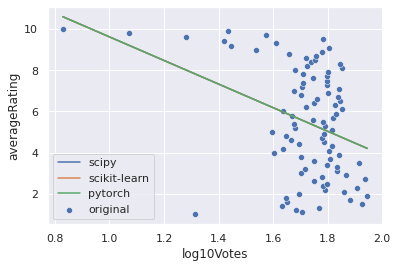

In [38]:
fig, ax = plt.subplots()
sns.scatterplot(data = grouped_rating, y="averageRating", x = "log10Votes", label = "original", ax = ax)
sns.lineplot( x =  grouped_rating.log10Votes, y=res.intercept + res.slope*x.values.flatten(), label= "scipy", ax = ax)
sns.lineplot( x =  grouped_rating.log10Votes, y=y_prediction.flatten(), label = "scikit-learn", dashes = True, ax = ax)
sns.lineplot( x =  grouped_rating.log10Votes, y=predicted.flatten(), label = "pytorch", dashes = True, ax = ax)